In [1]:
# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [2]:
# Useful functions
def get_score(X_train, y_train, X_test, y_test, Classifier, options={}):
    model = Classifier(**options)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return metrics.accuracy_score(y_test, y_pred)


def get_cv_score(X, y, Classifier, /, options={}, *, cv=10, scoring='accuracy'):
    scores = cross_val_score(Classifier(**options), X, y, cv=cv, scoring=scoring)
    return scores.mean()

In [3]:
# Read data
df = pd.read_csv('weather.csv', parse_dates=True, index_col='Date')
data = df.drop(columns=["WindGustDir", "WindDir9am", "WindDir3pm"], axis=1)

In [4]:
# Remove columns with too many NaNs
# Find number of missing values in each column
na_nums = np.array([data[col].isna().sum() for col in data.columns])
na_nums_gt500 = np.select([na_nums <= 500, na_nums > 500], [0, 1])  # entries of na_nums>500
cols_na_gt500 = [col for n, col in zip(na_nums_gt500, data.columns) if n]  # corresponding columns
data = data.drop(columns=cols_na_gt500, axis=1)
data_clean = data.copy().dropna()

In [5]:
# Convert categorical features to numeric
data_clean["RainTomorrow"], _ = data_clean["RainTomorrow"].factorize(sort=True)
data_clean["RainToday"], _ = data_clean["RainToday"].factorize(sort=True)

In [6]:
# Split data into train and test sets
X = data_clean
y = X.pop("RainTomorrow")
X_train, X_test, y_train, y_test = train_test_split(X, y)

Optimal k=11 with an accuracy of 0.8826452554168884 with uniform weight method.
Optimal k=11 with an accuracy of 0.8826452554168884 with distance weight method.


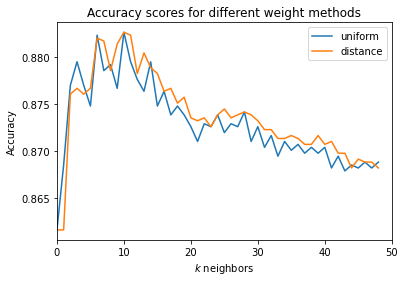

In [7]:
# K-nearest neighbors model: find best hyperparameter k and weight method.
scores_u = []  # uniform weights
scores_d = []  # weights inversely related to distance
for k in range(1, 50):
    for weight in ['uniform', 'distance']:
        # score = get_score(X_train, y_train, X_test, y_test,
        #                   KNeighborsClassifier, {'n_neighbors': k, 'weights': weight})
        score = get_cv_score(X, y, KNeighborsClassifier, {'n_neighbors': k, 'weights': weight})
        scores_u.append(score) if weight == 'uniform' else scores_d.append(score)

fig, ax = plt.subplots()
ax.plot(scores_u)
ax.plot(scores_d)
ax.legend(['uniform', 'distance'])
ax.set(title='Accuracy scores for different weight methods',
       xlabel='$k$ neighbors', ylabel='Accuracy', xlim=(0, 50))

k_best_u = scores_u.index(np.max(scores_u))
k_best_d = scores_d.index(np.max(scores_d))
print(f"Optimal k={k_best_u + 1} with an accuracy of {scores_u[k_best_u]} with uniform weight "
      "method.")
print(f"Optimal k={k_best_d + 1} with an accuracy of {scores_d[k_best_d]} with distance weight "
      "method.")

In [8]:
# Try a random forest classifier
# score = get_score(X_train, y_train, X_test, y_test,
#                   RandomForestClassifier, {'max_depth': 3, 'max_leaf_nodes': 3})
score = get_cv_score(X, y, RandomForestClassifier, {'max_depth': 3, 'max_leaf_nodes': 3})

In [9]:
score

0.9284527118944815